<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

# <center>Dimensionality Reduction</center>

### <b>Welcome to Lab 5a of Machine Learning 101 with Python.</b>
<p><b>Machine Learning is a form of artificial intelligence (AI), where the system can "learn" without explicitly being coded</b></p>

In this lab exercise, you will learn how to use <b>Dimensionality Reduction</b> in the form of <b>Feature Selection</b> and <b>Feature Extraction</b>.


### Some Notebook Commands Reminders:
<ul>
    <li>Run a cell: CTRL + ENTER</li>
    <li>Create a cell above a cell: a</li>
    <li>Create a cell below a cell: b</li>
    <li>Change a cell to Markdown: m</li>
    
    <li>Change a cell to code: y</li>
</ul>

<b> If you are interested in more keyboard shortcuts, go to Help -> Keyboard Shortcuts </b>

<b> <i> Before starting the lab, please run the following code in order to access the solutions </i> </b>

In [1]:
from IPython.core.display import HTML
HTML("""
<style type="text/css">
    #ans:hover { background-color: black; }
    #ans {padding: 6px; 
        background-color: white; 
        border: green 2px solid;
        font-weight: bold}
</style>
""") 

# <u>Dimensionality Reduction: Feature Selection with VarianceThreshold and Univariance</u>

We will first be looking at Feature Selection with <b>VarianceThreshold</b>. VarianceThreshold is a useful tool to removing features with a threshold variance. It is a simple and basic Feature Selection.

First import <b>VarianceThreshold</b> from sklearn.feature_selection

In [0]:
from sklearn.feature_selection import VarianceThreshold

Hover over the green box below for the answer
<p id="ans"> 
<font color = "white"> from sklearn.feature_selection import VarianceThreshold</font>
</p>

Now let's instantiate <b>VarianceThreshold</b> as a variable called <b>sel</b>

In [0]:
sel=VarianceThreshold()

Hover over the green box below for the answer
<p id="ans"> 
<font color = "white"> sel = VarianceThreshold()</font>
</p>

Now <b>VarianceThreshold</b> removes all <b>zero-variance features</b> by default. These features are any <b>constant value</b> features. Given the dataset below, let's try to run <b>fit_transform</b> function from <b>sel</b> on it.

In [4]:
dataset = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
dataset

[[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]

In [0]:
dataset=sel.fit_transform(dataset)

In [6]:
dataset

array([[2, 0],
       [1, 4],
       [1, 1]])

Hover over the green box below for the answer
<p id="ans"> 
<font color = "white"> sel.fit_transform(dataset)</font>
</p>

Now you should have only <b>two features</b> left. The first & last feature was removed since it had a <b>variance</b> of 0. You probably won't encounter constant value features very often, therefore you will want to keep a certain <b>threshold</b>. 

We can change the threshold by adding <b>threshold='threshold value'</b> inside the brackets during the instantiation of <b>VarianceThreshold</b>. Where <b>'threshold value'</b> is equal to p(1-p)
Where <b>'p'</b> is your threshold % in <b>decimal format</b>.

So, for example if I wanted a threshold of <b>60%</b>, I would equate <b>threshold=0.6 * (1 - 0.6)</b>

Now let's instantiate another <b>VarianceThreshold</b> but with a threshold of <b>60%</b>. We'll called it <b>sel60</b>.

In [0]:
sel60=VarianceThreshold(threshold=0.6*(1-0.6))

Hover over the green box below for the answer
<p id="ans"> 
<font color = "white"> sel60 = VarianceThreshold(threshold=(0.6 * (1 - 0.6)))</font>
</p>

Now let's <b>fit_transform</b> our dataset with <b>sel60</b>. Can you guess what will happen?

In [8]:
dataset2 = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
dataset2=sel60.fit_transform(dataset2)
dataset2

array([[0],
       [4],
       [1]])

Hover over the green box below for the answer
<p id="ans"> 
<font color = "white"> sel60.fit_transform(dataset)</font>
</p>

You should only have <b>one feature</b> left. The third column feature was the only feature to have a variance of <b>at least 60%</b>.

Now let's look at <b>Univariance Feature Selection</b>.

We will need to import <b>SelectKBest</b> from <b>sklearn.feature_selection</b>, <b>chi2</b> from <b>sklearn.feature_selection</b>, <b>numpy</b> as <b>np</b>, and <b>pandas</b>.

In [0]:
from sklearn.feature_selection import SelectKBest,chi2
import numpy as np
import pandas

Hover over the green box below for the answer
<p id="ans"> 
<font color = "white"> from sklearn.feature_selection import SelectKBest <br>
from sklearn.feature_selection import chi2 <br>
import numpy as np <br>
import pandas</font>
</p>

Now we will be working with the <b>skulls dataset</b> once again. Using the <b>my_data</b> variable and <b>removeColumns</b> function, create a variable called <b>X</b> which has the <b>row column dropped</b>.

In [0]:
my_data = pandas.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/HSAUR/skulls.csv", delimiter=",")

In [0]:
# Remove the column containing the target name since it doesn't contain numeric values.
# Also remove the column that contains the row number
# axis=1 means we are removing columns instead of rows.
# Function takes in a pandas array and column numbers and returns a numpy array without
# the stated columns
def removeColumns(pandasArray, *column):
    return pandasArray.drop(pandasArray.columns[[column]], axis=1).values

In [12]:
X=removeColumns(my_data,0,1)
X[:5]

array([[131, 138,  89,  49],
       [125, 131,  92,  48],
       [131, 132,  99,  50],
       [119, 132,  96,  44],
       [136, 143, 100,  54]])

Hover over the green box below for the answer
<p id = "ans"> <font color = "white"> X = removeColumns(my_data, 0, 1) </font> </p>

Now use the <b>target function</b> to obtain the <b>Response Vector</b> of <b>my_data</b> and store it as <b>y</b>

In [0]:
def target(numpyArray, targetColumnIndex):
    target_dict = dict()
    target = list()
    count = -1
    for i in range(len(my_data.values)):
        if my_data.values[i][targetColumnIndex] not in target_dict:
            count += 1
            target_dict[my_data.values[i][targetColumnIndex]] = count
        target.append(target_dict[my_data.values[i][targetColumnIndex]])
    return np.asarray(target)

In [20]:
my_data.values[:5]

array([[1, 'c4000BC', 131, 138, 89, 49],
       [2, 'c4000BC', 125, 131, 92, 48],
       [3, 'c4000BC', 131, 132, 99, 50],
       [4, 'c4000BC', 119, 132, 96, 44],
       [5, 'c4000BC', 136, 143, 100, 54]], dtype=object)

In [15]:
y=target(my_data.values,1)
y[:5]

array([0, 0, 0, 0, 0])

Hover over the green box below for the answer
<p id="ans"><font color = "white">y = target(my_data, 1)</font>
</p>

Now take a look at <b>X's shape</b> before the feature selection

In [16]:
X.shape

(150, 4)

Hover over the green box below for the answer
<p id="ans"><font color = "white">X.shape</font>
</p>

Now we will use the <b>fit_transform</b> function with parameters <b>X</b>, <b>y</b> of <b>SelectKBest</b> with parameters <b>chi2</b>, <b>k=3</b>. This will be stored as <b>X_new</b>.
<br><br>
<b>Note</b>: There is a VisibleDeprecationWarning, you can ignore it.

In [0]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)

Hover over the green box below for the answer
<p id="ans"><font color = "white">X_new = SelectKBest(chi2, k=3).fit_transform(X, y)</font>
</p>

Now let's check out the shape of <b>X_new</b>, it should have <b>one less</b> feature than before!

In [21]:
print X_new.shape
X_new[:5]

(150, 3)


array([[131, 138,  89],
       [125, 131,  92],
       [131, 132,  99],
       [119, 132,  96],
       [136, 143, 100]])

Hover over the green box below for the answer
<p id="ans"><font color = "white">X_new.shape</font>
</p>

How <b>Univariance</b> works is that it selects <b>features</b> based off of <b>univariance statistical tests</b>. <b>chi2</b> is used as a <b>univariance scoring function</b> which returns <b>p</b> values. We specified <b>k=3</b> for the <b>3 best features</b> to be chosen. Now we will move onto <b>Feature Extraction!</b>

## <u>Feature Extraction with DictVectorizer and PCA</u>

<b>DictVectorizer</b> is a very simple <b>Feature Extraction</b> class as it can be used to <b>convert feature arrays</b> in a <b>dict</b> to <b>NumPy/SciPy</b> representations.

First we will need to import <b>DictVectorizer</b> from <b>sklearn.feature_extraction</b>

In [0]:
from sklearn.feature_extraction import DictVectorizer

Hover over the green box below for the answer
<p id="ans"><font color = "white">from sklearn.feature_extraction import DictVectorizer</font>
</p>

We will use the following <b>dictionary</b> to be <b>converted</b>.

In [0]:
dataset = [
...     {'Day': 'Monday', 'Temperature': 18},
...     {'Day': 'Tuesday', 'Temperature': 13},
...     {'Day': 'Wednesday', 'Temperature': 7},
... ]

Now create an <b>instance</b> of <b>DictVectorizer</b> called <b>vec</b>

In [0]:
vec=DictVectorizer()

Hover over the green box below for the answer
<p id="ans"><font color = "white">vec = DictVectorizer()</font>
</p>

Now we will use the <b>fit_transform</b> function of <b>vec</b> with the parameter <b>dataset</b> and use the <b>.toarray()</b> on the final product

In [25]:
dataset=vec.fit_transform(dataset).toarray()
dataset

array([[ 1.,  0.,  0., 18.],
       [ 0.,  1.,  0., 13.],
       [ 0.,  0.,  1.,  7.]])

Hover over the green box below for the answer
<p id="ans"><font color = "white">vec.fit_transform(dataset).toarray()</font>
</p>

Now we can see that our <b>dataset</b> has been <b>converted</b> into an <b>array format</b> but pertaining its <b>data</b>. We can further review the <b>data</b> with the <b>get_feature_names</b> function of <b>vec</b>.

In [26]:
vec.get_feature_names()

['Day=Monday', 'Day=Tuesday', 'Day=Wednesday', 'Temperature']

Hover over the green box below for the answer
<p id="ans"><font color = "white">vec.get_feature_names()</font>
</p>

Now we will use <b>PCA</b> to represent the <b>data</b> we used in feature selection(<b>X_new</b>) and project it's dimensions so make sure you have completed that portion! But first we must import <b>matplotlib.pyplot</b> as <b>plt</b>, <b>Axes3D</b> from <b>mpl_toolkits.mplot3d</b>, and <b>decomposition</b> from <b>sklearn</b>. <i>(And numpy as np if you haven't already!)</i> Make sure you include the <b>%matplotlib inline</b> to have the plot show up in your notebook!

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
%matplotlib inline

Hover over the green box below for the answer
<p id="ans"><font color = "white">import matplotlib.pyplot as plt<br>
from mpl_toolkits.mplot3d import Axes3D<br>
from sklearn import decomposition<br>
%matplotlib inline</font>
</p>

Now we will just create instances of <b>plt.figure</b> as <b>fig</b> and <b>Axes3D</b> as <b>ax</b> with the following dimensions. In this case we specificed dimensions where <b>elev=0</b> and <b>azim=0</b> to see the graph from where the <b>z plane = 0</b>. This will be useful to <b>visualize</b> the <b>difference</b> later on.

<i> Note: You can change the elev and azim later on to see the graph in different ways. But it is suggested to keep it as is for now.</i>

We will plot <b>X_new</b> against <b>y</b> with the <b>scatter</b> function of <b>ax</b>. The <b>scatter</b> function will include all of <b>X_new's column data</b> (each as a seperate parameter), <b>c=y</b>, and <b>cmap=plt.cm.spectral</b> as below.

<b>Note</b>: You can ignore the FutureWarning.

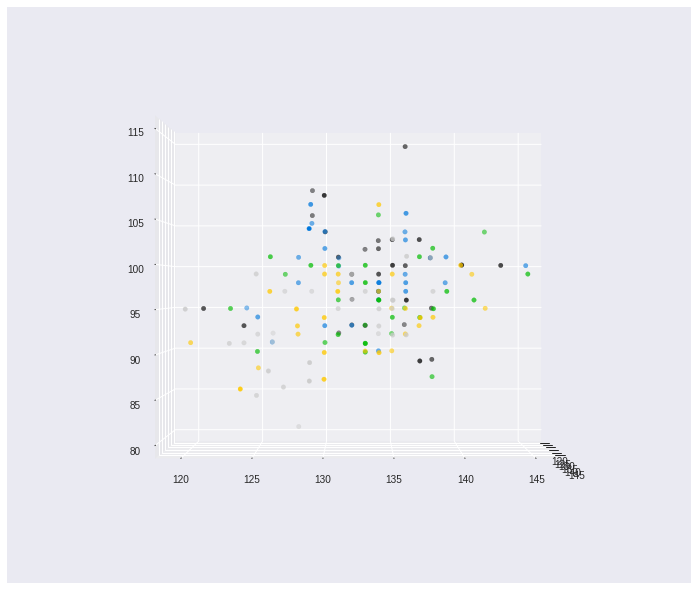

In [29]:
fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=0, azim=0)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=plt.cm.spectral)

Now you know what a <b>3D representation</b> of that data looks like from a <b>z = 0 plane perspective</b>, we will create an instance of <b>decomposition.PCA</b> called <b>pca</b> with parameters of <b>n_components=2</b>.

In [0]:
pca = decomposition.PCA(n_components=2)

Hover over the green box below for the answer
<p id="ans"><font color = "white">pca = decomposition.PCA(n_components=2)</font>
</p>

Now, like you have done in previous labs, we will <b>fit</b> the data with the <b>fit</b> function of <b>pca</b> with parameter <b>X_new</b>

In [31]:
pca.fit(X_new)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Hover over the green box below for the answer
<p id="ans"><font color = "white">pca.fit(X_new)</font>
</p>

Use the <b>transform</b> function of <b>pca</b> with parameter <b>X_new</b> and equate it to a new variable called <b>PCA_X</b>. This will be the <b>projection</b> resulting in the change of <b>3 features</b> to <b>2</b>.

In [0]:
PCA_X = pca.transform(X_new)

Hover over the green box below for the answer
<p id="ans"><font color = "white">PCA_X = pca.transform(X_new)</font>
</p>

Now plot <b>PCA_X</b> with <b>y</b> using the <b>scatter</b> function of <b>ax</b> as we did before. All the <b>parameters</b> will be the <b>same</b> except you are using <b>PCA_X</b> and the <b>highest</b> index column you are going to is <b>PCA_X[:, 1]</b>. Make sure you include the <b>fig</b> and <b>ax</b> declaration to make the graph show up!

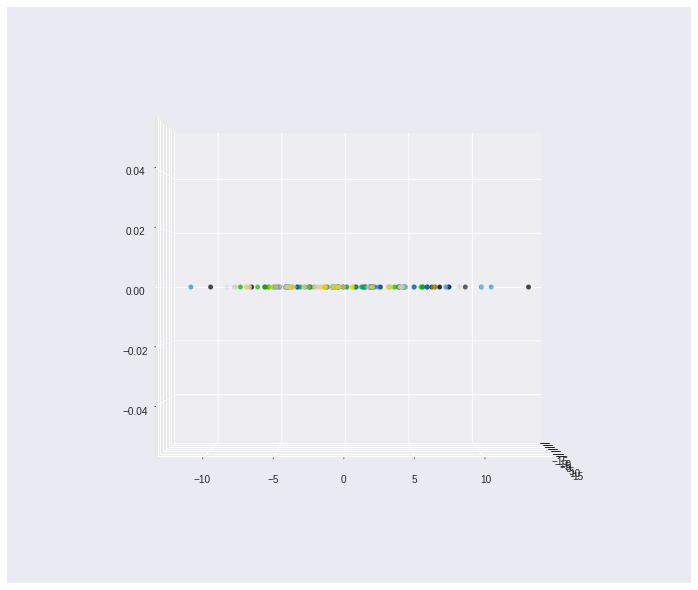

In [33]:
fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=0, azim=0)
ax.scatter(PCA_X[:, 0], PCA_X[:, 1], c=y, cmap=plt.cm.spectral)

Hover over the green box below for the answer
<p id="ans"><font color = "white">fig = plt.figure(1, figsize=(10, 8))<br>
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=0, azim=0)<br>
ax.scatter(PCA_X[:, 0], PCA_X[:, 1], c=y, cmap=plt.cm.spectral)</font>
</p>

Now as you can see, given the <b>same view</b>, there are <b>no datapoints</b> except on the <b>z = 0 plane</b>. Rather the <b>datapoints</b> are on the <b>other axes</b> confirming a <b>projection</b> from <b>3 features</b> to <b>2</b>. You can even look at the <b>shape</b> of <b>PCA_X</b> to show <b>2 features</b>.

In [34]:
PCA_X.shape

(150, 2)

Hover over the green box below for the answer
<p id="ans"><font color = "white">PCA_X.shape</font>
</p>

You may wish to <b>change</b> the values of <b>elev</b> and <b>azim</b> if you would like to view the graph in <b>different perspectives</b>. <b>Elev</b> controls the <b>elevation</b> of the <b>z plane</b> and <b>azim</b> controls the <b>azimuth angle</b> in the <b>x,y plane</b>.

# <u>Overview</u>

You have looked at <b>Feature Selection</b> with <b>VarianceThreshold</b> and <b>Univariance</b> to select the correct features. Then you have worked on <b>Feature Extraction</b> with <b>DictVectorizer</b> to convert dictionaries to the correct format of array. You have also used <b>PCA</b> to <b>visualize</b> your <b>data</b> from <b>Feature Selection</b> and <b>projected</b> it onto another <b>plane</b>.

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler for Mac users](https://cocl.us/ML0101EN_SPSSMod_mac) and [SPSS Modeler for Windows users](https://cocl.us/ML0101EN_SPSSMod_win)

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0101EN_DSX)

---
# Additional Resources
<br>
Dimensionality Reduction: https://www.youtube.com/watch?v=q115CrtZ_3s
<br><br>
Feature Selection: http://scikit-learn.org/stable/modules/feature_selection.html
<br><br>
Feature Extraction:
http://scikit-learn.org/stable/modules/feature_extraction.html

<hr>
Copyright &copy; 2017 [IBM Cognitive Class](https://cocl.us/ML0101_cclab). This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).